<a href="https://colab.research.google.com/github/aka-hombre/MAT422/blob/main/MAT422_HW3_5_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [127]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from IPython.display import display, Latex
from sympy import *
from scipy.stats import poisson,norm, pearsonr
from matplotlib.colors import ListedColormap
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score

#3.4 K-means Clustering

K-means clustering is a method of clulstering data points. We do this by defining an amount of clusters in our data $k$, which can be doine optimaly with methods like the "elbow method." Using the elbow method, we plot the within-cluster sum of squares (WCSS) against different values of $k$ and identifying the point where the rate of decrease sharply slows down, resembling an "elbow" in the plot. The optimal clusitering of $k$, is the minimization of WCSS. We will continue to look at crop data to see if the k-means clustering can pick out the total number of crop-type in our data.

In [4]:
url = url = 'https://drive.google.com/uc?export=download&id=1lAcBpLN5aYE6S1wFY3QHQFiD05S9d_2o' #loading in data

data = pd.read_csv(url)
data.head()

,N,P,K,ph,crop
0,90,42,43,6.502985,rice
1,85,58,41,7.038096,rice
2,60,55,44,7.840207,rice
3,74,35,40,6.980401,rice
4,78,42,42,7.628473,rice


Unique crop types: ['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']
Number of crop type: 22


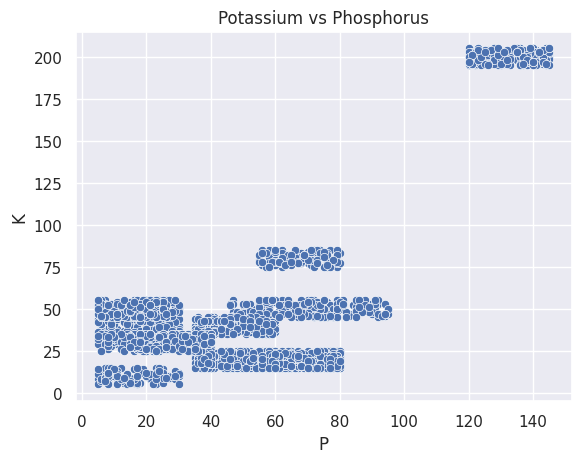

<Figure size 640x480 with 0 Axes>

In [44]:
sns.set_theme()

# Count frequency of each crop type
unique_crops = data['crop'].unique()
print("Unique crop types:", unique_crops)
print("Number of crop type: "+str(len(unique_crops)))


# Plot Scatter Plot
sns.scatterplot(data=data, x='P', y='K')
plt.title("Potassium vs Phosphorus");
plt.xlabel("P");
plt.ylabel("K");
plt.show();
plt.tight_layout();

Let's see if we can find the 22 crop types.

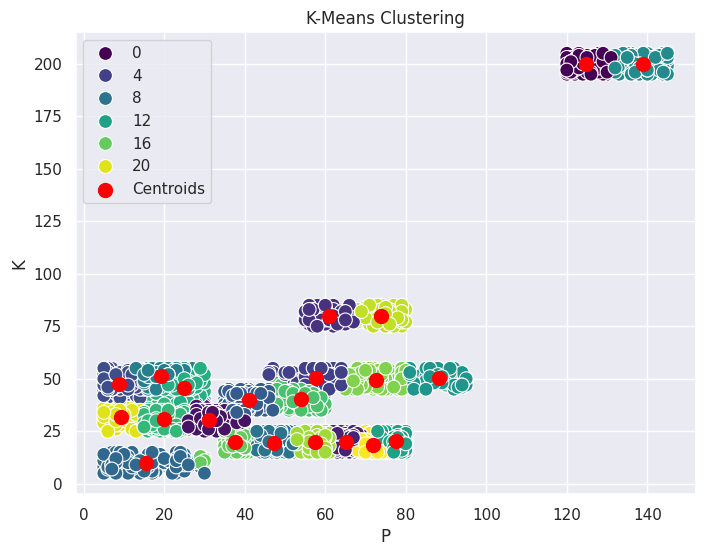


Within-Cluster Sum of Squares (Inertia): 51647.53103549599


In [54]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=22, random_state=0)

# Fit the model to the data and predict clusters
data['cluster'] = kmeans.fit_predict(data[['P', 'K']])

# Plot the data with seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='P', y='K', hue='cluster', palette='viridis', s=100)

# Plot centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=100, c='red', marker='o', label='Centroids')

plt.title('K-Means Clustering')
plt.legend()
plt.show()
print()
print("Within-Cluster Sum of Squares (Inertia):", kmeans.inertia_)


Inertia is a metric of how well our model is working. We want a model with low inertia and low number of $k$. We will compute our ineritias, between 1-22.

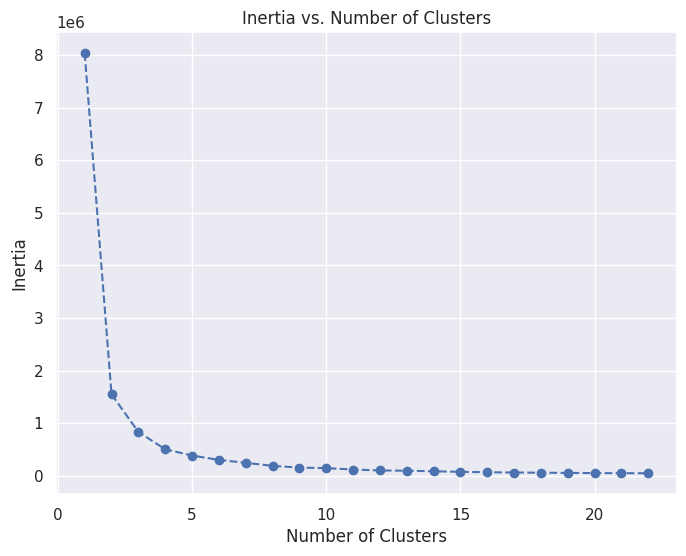

In [70]:
# Compute inertias
kmeans = [KMeans(n_clusters=(i+1), random_state=0) for i in range(22)]
inertias = [kmeans[i].fit(data[['P', 'K']]).inertia_ for i in range(22)]


# Plot the inertias
plt.figure(figsize=(8, 6))
plt.plot(range(1, 23), inertias, marker='o', linestyle='--');
plt.title('Inertia vs. Number of Clusters');
plt.xlabel('Number of Clusters');
plt.ylabel('Inertia');
plt.show()


In [78]:
print("Inertia for k=8: "+str(inertias[7]))
print("Diffrence between inertia for k=8 - k=22: "+str(inertias[7]-inertias[21]))

Inertia for k=8: 192267.70742758573
Diffrence between inertia for k=8 - k=22: 140620.17639208975


##3.6 Support vector machine

A support Vector machine is a supervised machine learning algorithm, and we will use it to try to classify crop type (grapes or not grapes) using linear seperation, based on the features of Phosphorus and Potassium levels. Here grapes will be represented by 1, and everything else by 0.

In [139]:
X = data.iloc[1:, 1::2]  # P and K
y = data.iloc[1:, 4]   # crop type

Y = (y == 'grapes').astype(int)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

# Feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fit the SVC model
classifier = SVC(kernel='linear', random_state=0)
classifier.fit(X_train, y_train)

# Predict the test set results
y_pred = classifier.predict(X_test)

print(f"SVM Accuracy: {accuracy_score(y_test, y_pred)}")

# Visualization
X_set, y_set = X_test, y_test

# Create a meshgrid for the feature space
x_min, x_max = X_set[:, 0].min() - 1, X_set[:, 0].max() + 1
y_min, y_max = X_set[:, 1].min() - 1, X_set[:, 1].max() + 1
X1, X2 = np.meshgrid(np.arange(x_min, x_max, step=0.01),
                     np.arange(y_min, y_max, step=0.01))

# Predict the output for each point in the meshgrid
Z = classifier.predict(np.c_[X1.ravel(), X2.ravel()])
Z = Z.reshape(X1.shape)

SVM Accuracy: 0.95


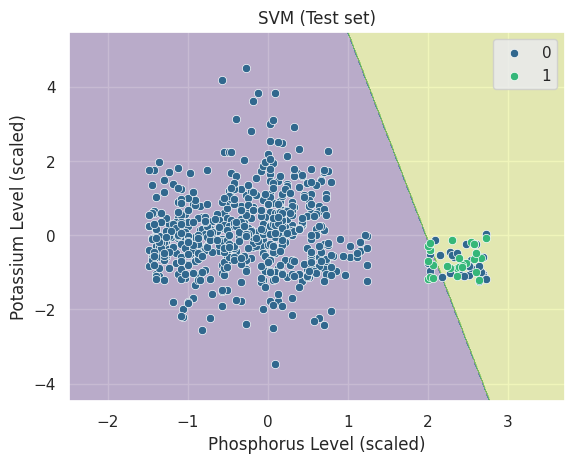

In [140]:
# Set the color palette using Seaborn
sns.set_palette("viridis")

# Plotting the contour with the 'viridis' colormap
contour = plt.contourf(X1, X2, Z, alpha=0.3, cmap='viridis')

# Set limits for the x and y axes
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Generate a palette with two colors from the 'viridis' color palette
viridis_palette = sns.color_palette("viridis", n_colors=2)

# Loop through the unique classes in y_set
for i, j in enumerate(np.unique(y_set)):
    sns.scatterplot(x=X_set[y_set == j, 0],
                    y=X_set[y_set == j, 1],
                    color=viridis_palette[i],
                    label=j)

plt.title('SVM (Test set)')
plt.xlabel('Phosphorus Level (scaled)')
plt.ylabel('Potassium Level (scaled)')
plt.legend();

Here our model predicts with 95 percent accuracy that our test data, is not grapes base on the soil levels of potassium and phosphorus. We can see where the model is splitting the data with the hyperplane above